In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from statsmodels.graphics.tsaplots import plot_pacf

from darkgreybox.model import TiTeThRia
from darkgreybox.fit import train_models

2020-10-13 10:39:44,766 darkgreybox  INFO     Logging enabled...


In [2]:
# the duration of a record
rec_duration = 1 # hour

In [3]:
train_df = pd.read_csv('./data/demo_data.csv', index_col=0, parse_dates=True)

input_X = train_df[['Ph', 'Ta', 'Th']]
input_y = train_df['Ti']

input_X['Ti0'] = input_y
input_X['Th0'] = input_y
input_X['Te0'] = input_y - 2 

print(f'Input X shape: {input_X.shape}, input y shape: {input_y.shape}')

Input X shape: (792, 6), input y shape: (792,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(input_X, input_y, test_size=5 / 33, shuffle=False)

print(f'Train: X shape: {X_train.shape}, y shape: {y_train.shape}')
print(f'Test: X shape: {X_test.shape}, y shape: {y_test.shape}')

Train: X shape: (672, 6), y shape: (672,)
Test: X shape: (120, 6), y shape: (120,)


In [8]:
train_params = {
    'Ti0': {'value': X_train.iloc[0]['Ti0'], 'vary': False},
    'Te0': {'value': X_train.iloc[0]['Te0'], 'vary': True, 'min': 10, 'max': 25},
    'Th0': {'value': X_train.iloc[0]['Th0'], 'vary': False},    
    'Ci': {'value': 1},
    'Ch': {'value': 2.55, 'vary': False},
    'Ce': {'value': 1},
    'Rie': {'value': 1},
    'Rea': {'value': 1},
    'Ria': {'value': 1},
    'Rih': {'value': 0.65, 'vary': False}
}

In [9]:
prefit_df = train_models(models=[TiTeThRia(train_params, rec_duration=1)],
                         X_train=X_train, 
                         y_train=y_train, 
                         splits=KFold(n_splits=int(len(X_train) / 24), shuffle=False).split(X_train), 
                         error_metric=mean_squared_error,
                         method='nelder', 
                         n_jobs=-1, 
                         verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:   20.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   21.6s finished


In [10]:
prefit_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2019-12-23 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,1.230772,nelder,3.196628e-01
1,2019-12-24 00:00:00+00:00,2019-12-24 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,0.789997,nelder,1.732286e-01
2,2019-12-25 00:00:00+00:00,2019-12-25 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,1.225970,nelder,2.780940e-02
3,2019-12-26 00:00:00+00:00,2019-12-26 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,1.516764,nelder,9.681792e-04
4,2019-12-27 00:00:00+00:00,2019-12-27 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,5.903949,nelder,1.961531e+14
5,2019-12-28 00:00:00+00:00,2019-12-28 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,0.406499,nelder,1.458258e+05
6,2019-12-29 00:00:00+00:00,2019-12-29 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,1.809046,nelder,8.220794e-03
7,2019-12-30 00:00:00+00:00,2019-12-30 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,5.605656,nelder,2.403188e+13
8,2019-12-31 00:00:00+00:00,2019-12-31 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,1.163741,nelder,5.587104e+01
9,2020-01-01 00:00:00+00:00,2020-01-01 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,2.674308,nelder,7.593837e+14


In [11]:
train_df = train_models(models=prefit_df['model'],
                        X_train=X_train, 
                        y_train=y_train, 
                        splits=None, 
                        error_metric=mean_squared_error,
                        method='nelder', 
                        n_jobs=-1, 
                        verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  24 out of  28 | elapsed:  4.4min remaining:   43.8s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  4.8min finished


In [12]:
train_df

,start_date,end_date,model,model_result,time,method,error
0,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,54.586091,nelder,0.197209
1,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,17.876951,nelder,0.695041
2,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,25.234176,nelder,0.849894
3,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.004673,nelder,NaN
4,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,92.854937,nelder,inf
5,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,99.361267,nelder,inf
6,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,3.566803,nelder,NaN
7,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,<darkgreybox.model.TiTeThRia object at 0x7f8dc...,<darkgreybox.model.DarkGreyModelResult object ...,89.428087,nelder,inf
8,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,1.695361,nelder,NaN
9,2019-12-23 00:00:00+00:00,2020-01-19 23:00:00+00:00,NaN,NaN,0.033850,nelder,NaN


In [13]:
model = train_df.loc[21, 'model']
train_results = train_df.loc[21, 'model_result']
model.result.params

name,value,initial value,min,max,vary
Ti0,18.1375000,18.1375,-inf,inf,False
Te0,18.8064058,16.1375,10.0000000,25.0000000,True
Th0,18.1375000,18.1375,-inf,inf,False
Ci,156.988743,123.12318785349164,-inf,inf,True
Ch,2.55000000,2.55,-inf,inf,False
Ce,389.155683,119.74278863412579,-inf,inf,True
Rie,0.11065592,0.07879250715449737,-inf,inf,True
Rea,3.6046e+11,1.7459804302454123,-inf,inf,True
Ria,0.63718670,0.5763440080733722,-inf,inf,True
Rih,0.65000000,0.65,-inf,inf,False


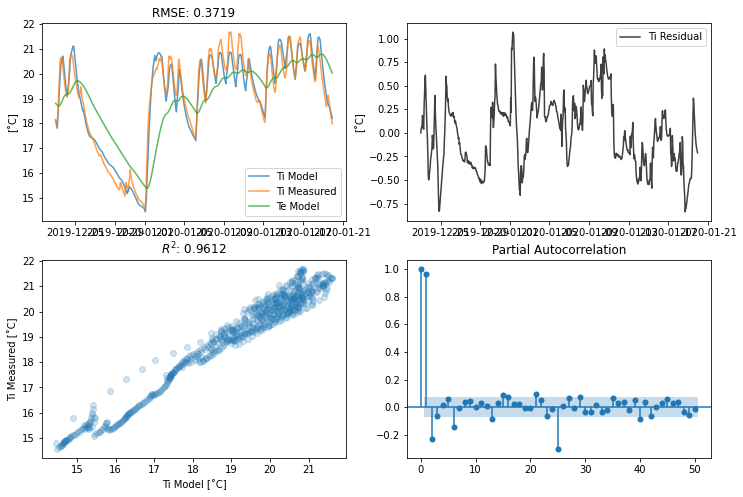

In [15]:
rmse = mean_squared_error(y_train, train_results.Z) ** 0.5
r2 = r2_score(y_train, train_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_train.index, train_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_train, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_train.index, train_results.Te, label='Te Model', alpha=0.75)
ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(train_results.Z, y_train, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_train.index, y_train - train_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_train - train_results.Z, ax=ax[1, 1], lags=50);


In [17]:
test_results = model.predict(X=X_test, ic_params={'Ti0': y_test.iloc[0], 'Te0': train_results.Te[-1]})

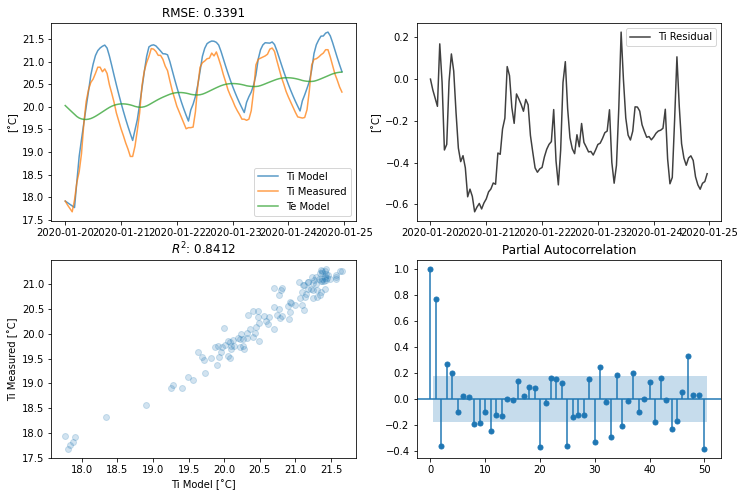

In [18]:
rmse = mean_squared_error(y_test, test_results.Z) ** 0.5
r2 = r2_score(y_test, test_results.Z)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].plot(y_test.index, test_results.Z, label='Ti Model', alpha=0.75)
ax[0, 0].plot(y_test, label='Ti Measured', alpha=0.75)
ax[0, 0].plot(y_test.index, test_results.Te, label='Te Model', alpha=0.75)

ax[0, 0].legend()
ax[0, 0].set_ylabel('[˚C]')
ax[0, 0].set_title(f'RMSE: {rmse:.4f}')

ax[1, 0].scatter(test_results.Z, y_test, alpha=0.2)
ax[1, 0].set_xlabel('Ti Model [˚C]')
ax[1, 0].set_ylabel('Ti Measured [˚C]')
ax[1, 0].set_title(f'$R^2$: {r2:.4f}')

ax[0, 1].plot(y_test.index, y_test - test_results.Z, label='Ti Residual', color='black', alpha=0.75)
ax[0, 1].legend()
ax[0, 1].set_ylabel('[˚C]')

plot_pacf(y_test - test_results.Z, ax=ax[1, 1], lags=50);
